# Are Popular Songs getting more Repetitive Over Time (Research Question)

# Authors
Alvin Chew (A12069834): data import/cleaning, visualization, statistical analysis

Jiajun Chen (A12456171): data import/cleaning, visualization, predictive analysis

Alex Mao (A13610957): data processing, data cleaning, discussion, conclusion

Diana Nguyen (A14265487): data processing, data cleaning, background research, ethics and privacy

Aaron Luo (A13782379): discussion, conclusion

### Background and Introduction

It is commonly thought that modern pop music has largely lost its artistic value. Musical timbre and musical complexity are said to be declining, singer talent is repeatedly maligned, but perhaps the most common complaint has been the continual decrease of the lyrical complexity of today’s songs. America’s Top 40 most popular songs are filled with repetitive, catchy hooks that have strayed far from the rock ballads of the 60s. Choruses appear far more often and are more lyrically redundant than those in the songs of older generations. Take, for example, Justin Beiber’s 2012 Billboard 100 hit, “Baby” (And I was like baby, baby, baby oh / Like baby, baby, baby no /Like baby, baby, baby oh) and compare it to Stevie Wonder’s 1969 hit, “My Cherie Amour” (My cherie amour, lovely as a summer day / My cherie amour, distant as the milky way / My cherie amour, pretty little one that I adore). Or, take Taylor Swift’s 2014 hit “Shake it Off”, which bridge and chorus repeats three times and takes up about 70% of the song, to Queen’s 1975 hit “Bohemian Rhapsody”, which doesn’t even have a chorus. We are interested in testing this notion by analyzing the lyrics of America’s most popular songs across 50 years and charting the general trend of lyrical complexity over time.

Our data for this project will largely be looking at the relationship between consumer behavior and lyrical complexity. Research has shown how setting the right acoustical atmosphere drastically increases spending and how popular music is often used because it keeps consumers shopping and moving quickly (Retailwise USA; Wilson, 2003; Morrin, 2005). However, songs with complex lyrics may negatively impact the consumer’s shopping experience as they distract the consumer and overload their working memory, causing the shopper to potentially miss something about the products in front of them that would otherwise convince them to buy (Kang et al., 2016). Therefore, the best way for stores to alleviate the effects of this phenomenon is to play more lyrically redundant songs so as to allow shoppers to concentrate more on shopping (Nunes et al., 2014).


### We define Repetitive Score in music lyrics to be: 
# 1 - ((# of unique words) / (# of total words))

# Research Question

We are interested in exploring whether popular songs get more repetitive over time and if this type of music increases consumer spending. To do this, we will look at the general trend of lyrical repetitiveness from 1965 to 2015 and compare it to the change in US GDP over the same time period. 


# Hypotheses

We hypothesize that popular songs are getting more repetitive across time, and that this lyrical repetitiveness has a positive correlation with annual U.S. GDP. This is because lyrical repetitiveness distracts the consumer less, thus stimulating spending behavior and ultimately increasing annual GDP. 

##### Hypothesis - There is a positive correlation between domestic GDP and how repetitive music is
(Mean Repetitiveness Score is higher when gdp is high)

##### Null Hypothesis - There is a negative, or no, correlation between domestic GDP and how repetitive music is
(Mean Repetitiveness Score is lower, or does not change, when gdp is low)

# Datasets

To examine the relationship between lyrical complexity and annual GDP, we are using two datasets: annual_gdp (Annual US GPD from 1929 to 2017) and billboard.csv (List of Popular Music Lyrics from 1965 to 2015)

#### annual_gdp.xlsx: 

This dataset obtained from the Bureau of Economic Analysis of the U.S.Department of Commerce contains information pertaining to the annual and quarterly GDP of years from 1929 to 2017. It has the raw GDP recorded that year as well as the GDP converted to account for inflation, they were calculated to match the value of dollars 2009. To make cleaning easier due to the way the file was formatted with headers, we deleted headers and some columns locally and created a new file called annual_gdp.csv.  
https://www.kaggle.com/rakannimer/billboard-lyrics/data

#### billboard.csv (originally billboard_lyrics_1964-2015.csv):

This data set obtained from kaggle (which we renamed) contains the year the song was popular, its rank from 1-100 in that year, song, artist, lyrics and the source.  
https://www.bea.gov/national/xls/gdplev.xlsx

#### 2018lyrics.csv:

This dataset was manually put together by finding a list of the top 20 billboard songs using the site (https://www.billboard.com/charts/hot-100). The lyrics were then manually copied into an excel file after a few quick google searches. The resulting excel file of song name and song lyrics were then exported as a csv file.

# Proposed Methods

How are we going to show that there is a positive correlation between GDP and Repetitive Score?

After data has been imported and cleaned, we will perform statistical analysis between our calculated repetitive score and the GDP to see if there is a relationship. We can do this using patsy as well the corr function from pandas. We can use the matplotlib to plot our data against one another, thus providing a visual representation of our data. After all this visualization and statistical analysis, if our data shows some type of relationship, we will use machine learning functions from the sklearn library to attempt to predict repetitiveness score of a given year to see how well that matches up with what we calculated.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import re
import requests
import urllib.request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import scipy.stats as stats
from scipy.stats import normaltest
from scipy.stats import norm

import patsy
import statsmodels.api as sm

from sklearn import linear_model

# Standard Python has some useful string tools
import string

# Collections is a part of standard Python, with some useful data objects
from collections import Counter

# Scikit-learn has some useful NLP tools, such as a TFIDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Data: Gathering, Wrangling, Cleaning, ensuring Privacy

When cleaning annual_gdp.csv, we removed the columns: “GDP in billions of current dollars” and 4 unnamed columns. We removed the “GDP in billions of current dollars” column because we have no use for data that is not scaled in anyway. Instead we choose to use the column of GDP scaled to the value of 2009 dollars. To further clean the GDP, we noticed there were commas in the GDP values which may be problematic later when performing statistical analysis because the values may need to be cast to a float. To correct this the helper function removeCommas was written and applied to the column.  

To clean billboard.csv, we removed the columns that we had no use for. These were the columns rank, song, artist, and source. The only columns we are interested in is “Year” and “Lyrics”. The year column will allow us to match a song to the GDP of that year and the lyrics column will allow us to perform analysis on the words of the song. Then we went through the lyrics column and removed all rows with NaN, instrumental only and lyrics with a length of less than 2 since these are considered bad data since we are performing analysis on lyrics. We then performed an analysis on the lyrics which was done by using the formula 1 - (unique words / word count of lyrics), which gives us values close to 1 being very repetitive and values close to 0 being not very repetitive.


Read in the annual GDP csv file

In [2]:
df_gdp = pd.read_csv("annual_gdp.csv")
df_gdp.head()

,Year,GDP in billions of current dollars,GDP in billions of chained 2009 dollars,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1929,104.6,"1,056.6",NaN,NaN,NaN,NaN
1,1930,92.2,966.7,NaN,NaN,NaN,NaN
2,1931,77.4,904.8,NaN,NaN,NaN,NaN
3,1932,59.5,788.2,NaN,NaN,NaN,NaN
4,1933,57.2,778.3,NaN,NaN,NaN,NaN


Printing the head, we see we need clean the data by removing some unnecessary columns.  
We want to drop the following columns:    
* GDP in billions of current dollars
* Unnamed: 3
* Unnamed: 4
* Unnamed: 5
* Unnamed: 6  

We have no need for the unadjusted dollars because it does not account for inflation/deflation so the dollars are not worth the same.  

These are columns 1, 3, 4, 5 and 6 respectively in pandas

In [3]:
df_gdp.drop(df_gdp.columns[[1, 3, 4, 5, 6]], axis=1, inplace=True)
df_gdp

,Year,GDP in billions of chained 2009 dollars
0,1929,"1,056.6"
1,1930,966.7
2,1931,904.8
3,1932,788.2
4,1933,778.3
5,1934,862.2
6,1935,939.0
7,1936,"1,060.5"
8,1937,"1,114.6"
9,1938,"1,077.7"


We can see the data needs to be cleaned because there are commas in the numbers that are greater than 999. This is problematic when performing computations on the values since it needs to be cast from a string to a float. So we will write a function to replace all commas given a string with no character and apply it to the GDP columns.

In [4]:
pd.options.mode.chained_assignment = None  # default='warn'
def removeCommas(s):
    return s.replace(',', '')

df_gdp['GDP in billions of chained 2009 dollars'] = df_gdp['GDP in billions of chained 2009 dollars'].apply(removeCommas)

Now that GDP has been cleaned, we can load and clean the music data

In [5]:
df_song = pd.read_csv("billboard.csv")
df_song.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


There is data in this file that we have no use for. These are the columns:
* Rank
* Song
* Artist
* Source  

So they will be dropped from the dataframe

In [6]:
df_song.drop(df_song.columns[[0, 1, 2, 5]], axis=1, inplace=True)
df_song

,Year,Lyrics
0,1965,sam the sham miscellaneous wooly bully wooly b...
1,1965,sugar pie honey bunch you know that i love yo...
2,1965,
3,1965,when i woke up this morning you were on my mi...
4,1965,you never close your eyes anymore when i kiss...
5,1965,when youre alone and life is making you lonel...
6,1965,help i need somebody help not just anybody hel...
7,1965,carterlewis every time i see you lookin my way...
8,1965,you saw me crying in the chapel the tears i s...
9,1965,ive got sunshine on a cloudy day when its cold...


We can further clean this data, by lookiing at the lyrics columns. We can see there are some songs with no lyric data denoted by NaN and instrumental songs denoted by instrumental. We will then drop all the rows with NaN and instrumental as the lyrics.

In [7]:
pd.options.mode.chained_assignment = None  # default='warn'
df_song.dropna(axis=0, inplace=True)
df_song = df_song[df_song['Lyrics'].map(len) > 2]
df_song = df_song[df_song['Lyrics'] != "instrumental"]
df_song = df_song.reset_index(drop=True)

We will now define a function to rank each song by its repetitivemenss. We will determine the repetitiveness by getting a count of the unique words in a song and dividing that by the number of words in its lyrics. Since (len(uniqueWords) / len(listLyric)) will give us a score in which lower scores are more repetitive and higher scores and less repetitive, we will return 1 - the score. This way when visualized both GDP and repetitiveness should show a positive trend.

In [8]:
def getRepetitiveScore(lyrics):
    listLyric = lyrics.split()
    uniqueWords = set(listLyric)
    return 1 - (len(uniqueWords) / len(listLyric)) 

We make a new column in the song dataframe to contain the repetitive score which is calculated by calling the getRepetitiveScore function.

In [9]:
df_song['RepetitiveScore'] = df_song['Lyrics'].apply(getRepetitiveScore)
df_song.head()

,Year,Lyrics,RepetitiveScore
0,1965,sam the sham miscellaneous wooly bully wooly b...,0.488000
1,1965,sugar pie honey bunch you know that i love yo...,0.539216
2,1965,when i woke up this morning you were on my mi...,0.710526
3,1965,you never close your eyes anymore when i kiss...,0.620690
4,1965,when youre alone and life is making you lonel...,0.497908


# Visualizations

Now that the data has been cleaned, we can visualize the data through plots to see the visual relationship between the data. We will begin with a histogram to look at the distribution of repetitiveness scores. Although we can see that the distribution is normal, we will plot the best fit line of the normal curve on top of this histogram to confirm it is normal.

1. We want to visualize a histogram of the repetitive score to see its distribution.
2. We want to visualize the GDP to see its trend between 1965 and 2015 to see whether or not the slope is positive or negative
3. We want to visualize the mean repetitive score from 1965 and 2015 to see whether or not the slope is positive or negative.


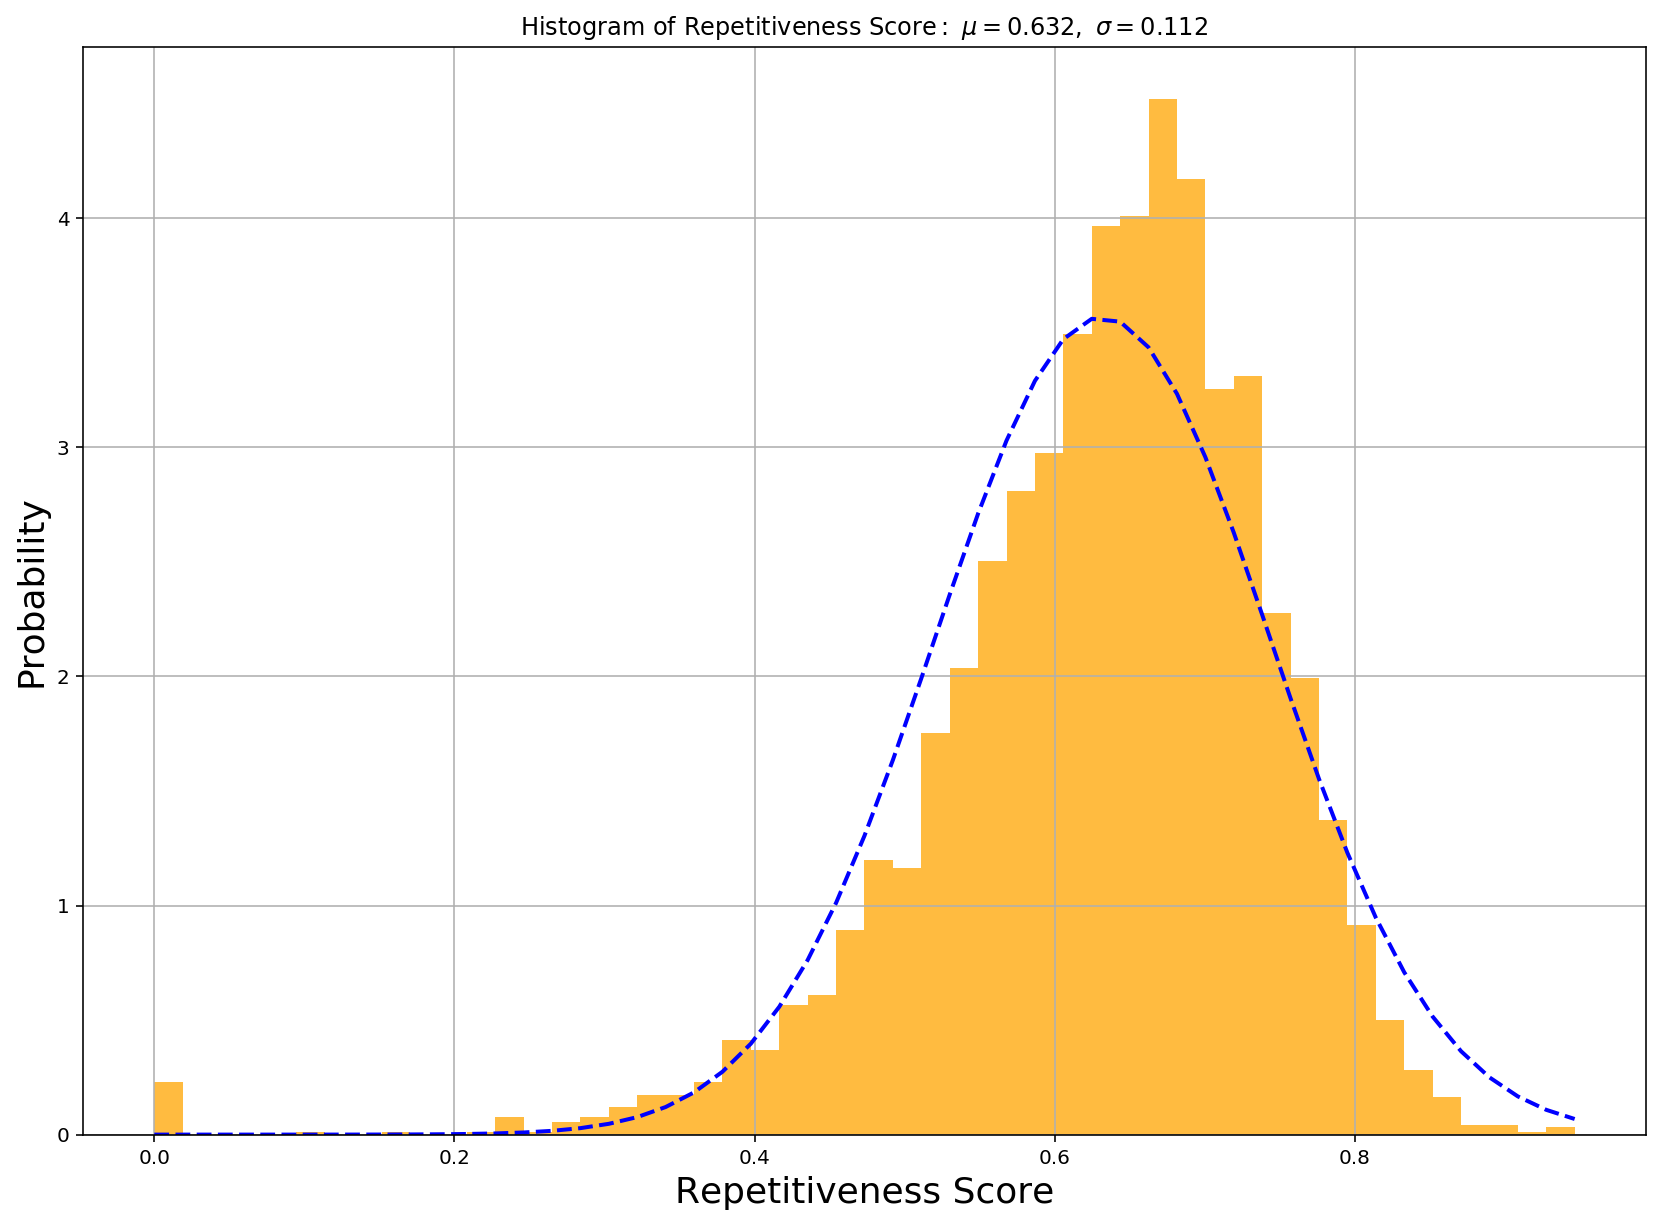

In [10]:
# This magic command plots figures directly in the notebook
%matplotlib inline
# This sets a higher resolution for figures
%config InlineBackend.figure_format = 'retina'


repetitive_score_list = df_song["RepetitiveScore"].tolist()

# best fit of data
(mu, sigma) = norm.fit(repetitive_score_list)

# the histogram of the data
plt.subplots(figsize=(14,10))
n, bins, patches = plt.hist(repetitive_score_list, 50, normed=1, facecolor='orange', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'b--', linewidth=2)

#plot

plt.xlabel('Repetitiveness Score', fontsize=18)
plt.ylabel('Probability', fontsize=18)
plt.title(r'$\mathrm{Histogram\ of\ Repetitiveness\ Score:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

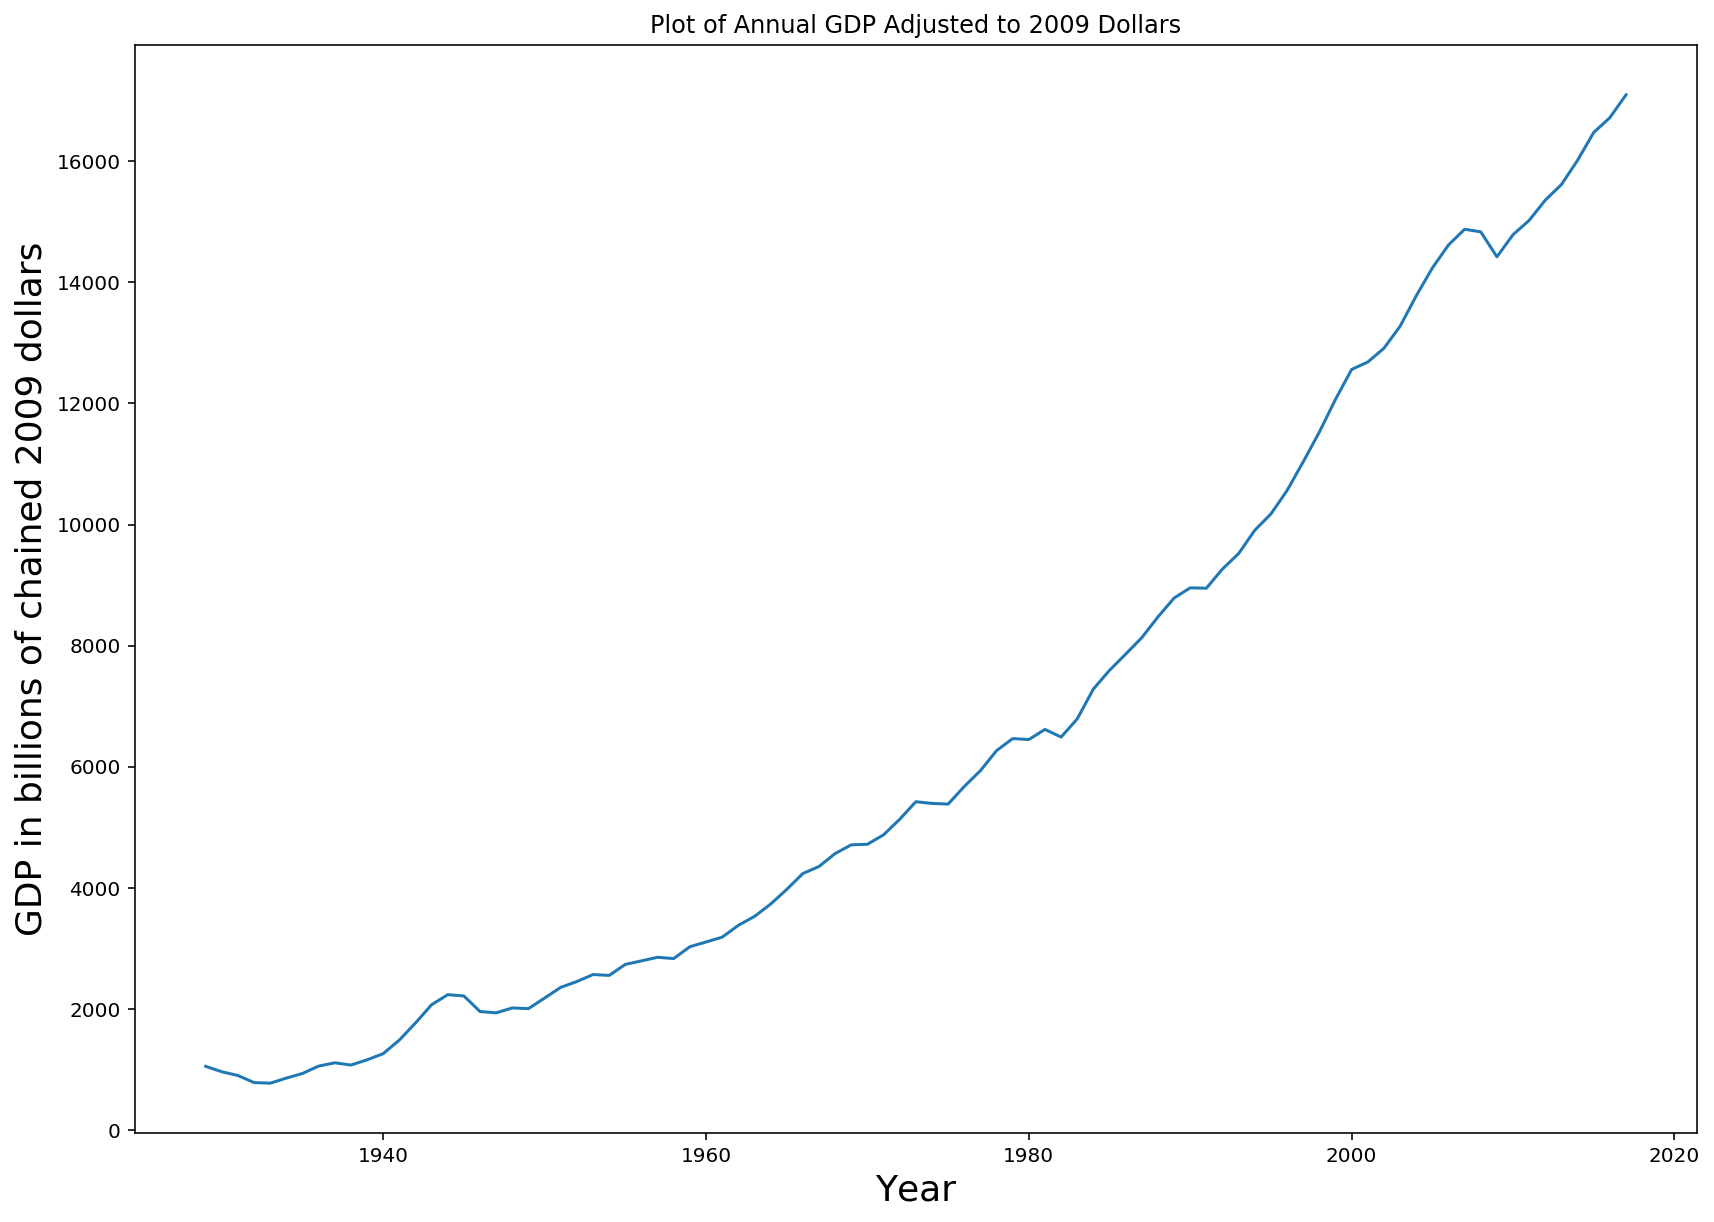

In [11]:
# Plot annual adjusted gdp

xs = df_gdp["Year"].tolist()
ys = df_gdp["GDP in billions of chained 2009 dollars"].tolist()
res = list(map(float, ys))  # cast to float from str
plt.subplots(figsize=(14,10))

plt.title('Plot of Annual GDP Adjusted to 2009 Dollars')
plt.xlabel('Year', fontsize=18)
plt.ylabel('GDP in billions of chained 2009 dollars', fontsize=18)
plt.plot(xs, res)

Lets make a new dataframe of year and repetitive scores. We don't want to remove the lyrics from the original dataframe so it makes more sense to just make a new dataframe of what we need.

In [12]:
# DF of year, repetitive score, gdp adjusted, gdp normalized
df_song_score = df_song.drop(df_song.columns[[1]], axis=1)
df_song_score.head()

,Year,RepetitiveScore
0,1965,0.488000
1,1965,0.539216
2,1965,0.710526
3,1965,0.620690
4,1965,0.497908


Lets make another dataframe of the average repetitive score by year.

In [13]:
# DF of mean repetitive score from each 5 years
df_mean_score = pd.DataFrame(columns=['Year', 'MeanRepetitiveScore'])
i = 0

# Find average repetitive score function
for i in range(1965, 2015, 1):
    scores = df_song_score[df_song_score['Year'] == i]
    scoreAvg = sum(scores["RepetitiveScore"].tolist()) / len(scores)
    df_mean_score.loc[i] = [i, scoreAvg]
    i = i + 1
df_mean_score = df_mean_score.reset_index(drop=True)
df_mean_score.head()

,Year,MeanRepetitiveScore
0,1965.0,0.601012
1,1966.0,0.557716
2,1967.0,0.548625
3,1968.0,0.591137
4,1969.0,0.579273


Lets plot the mean repetitive scores. We can see that it is a bit jagged but overall has a positive linear trend.

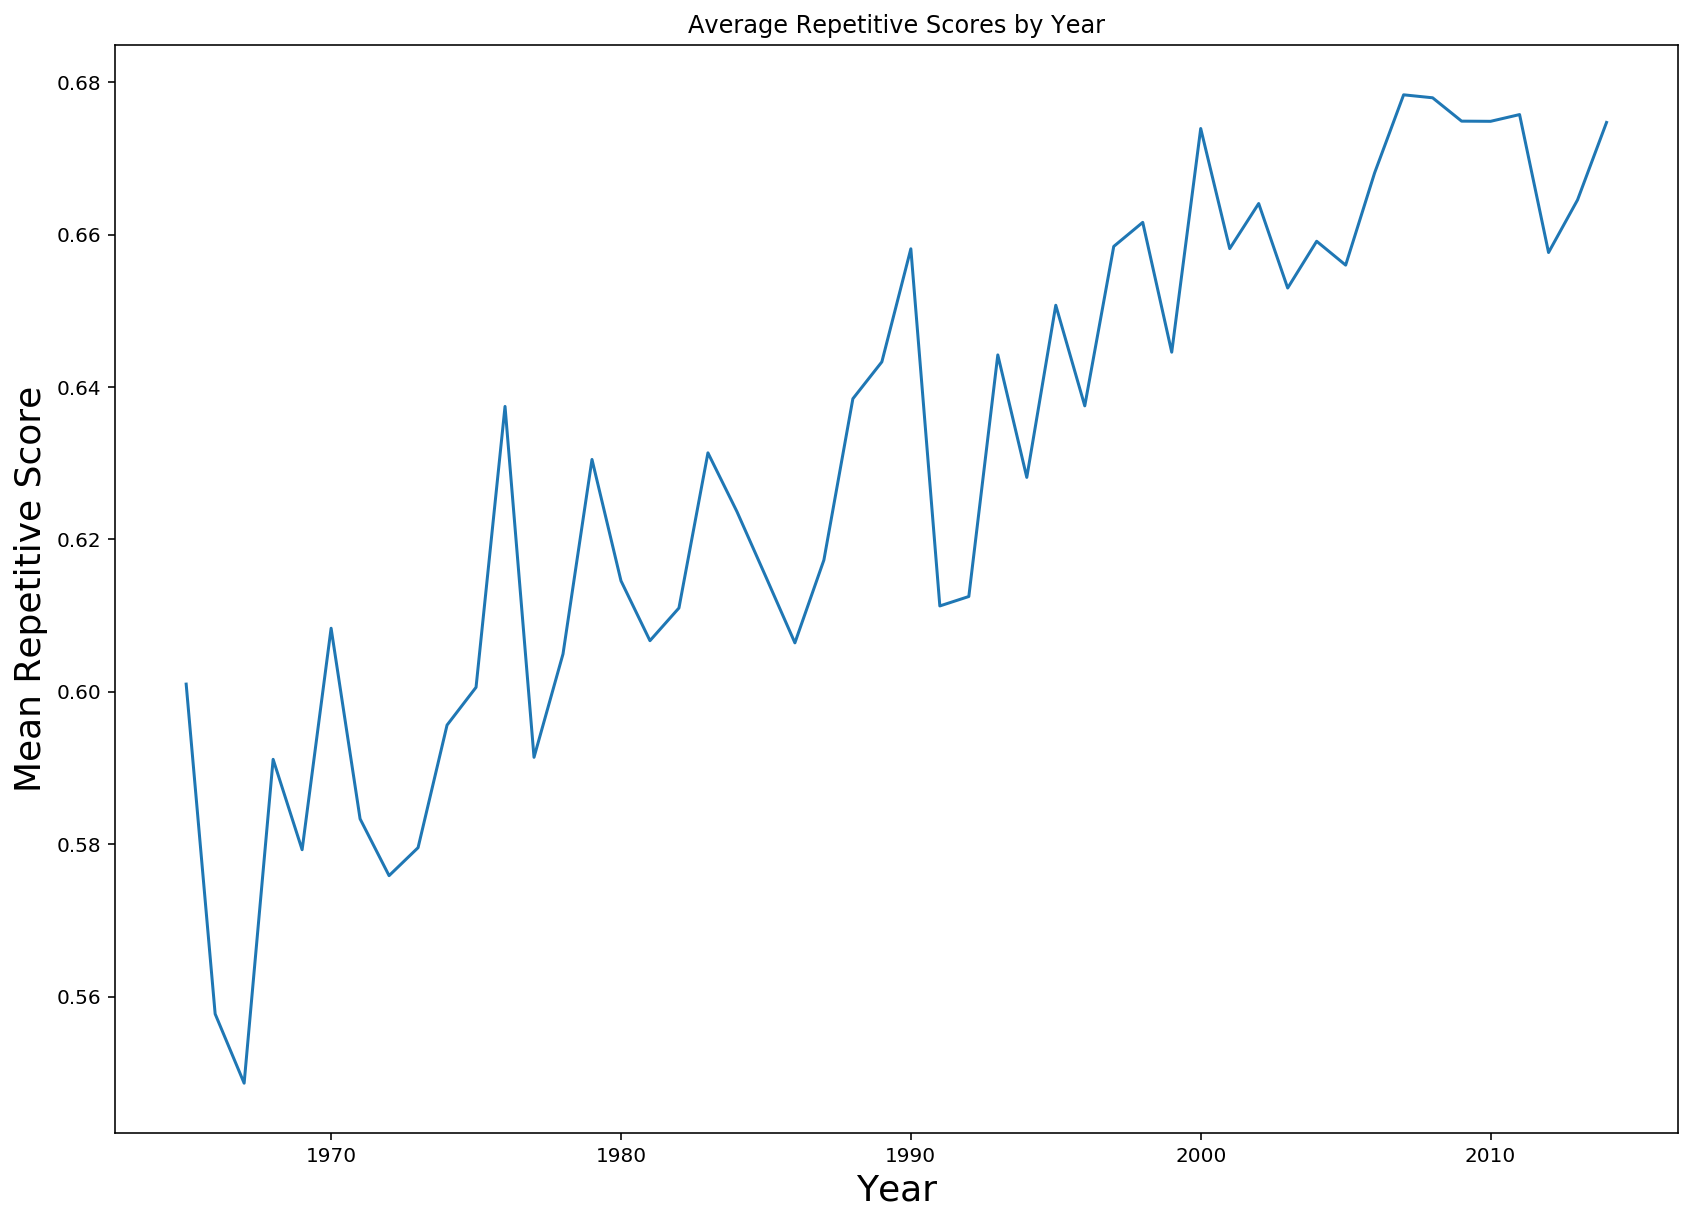

In [14]:
# plot with x-axis being year (1950 to 2015)
# y - axis is average repetitiveness score

xs = df_mean_score["Year"].tolist()
ys = df_mean_score["MeanRepetitiveScore"].tolist()
res = list(map(float, ys))  # cast to float from str
plt.subplots(figsize=(14,10))

plt.title('Average Repetitive Scores by Year')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Mean Repetitive Score', fontsize=18)
plt.plot(xs, res)

# It seems that the repetitiveness score has been decreasing over time

##### So what is the relationship between gdp and repetitiveness score? - There is a postitive correlation

getAdjustedGDP is a helper function to get the adjusted GDP from the dataframe so we can make a new column in df_song_score to hold the GDP adjusted in that dataframe as well.

In [15]:
def getAdjustedGDP(year):
    return df_gdp.loc[df_gdp['Year'] == int(year), 'GDP in billions of chained 2009 dollars'].iloc[0]

df_song_score['gdp_adjusted'] = df_song_score['Year'].apply(getAdjustedGDP)

Function to convert stringsToFloat. We need to do this to the gdp_adjusted column so we can perform mathematical operations on the values.

In [16]:
def stringToFloat(string):
    return float(string);

df_song_score['gdp_adjusted'] = df_song_score['gdp_adjusted'].apply(stringToFloat)

Make a copy of the df_song_score dataframe so we can sort it by GDP. This is needed because GDP sometime drops so to sort it from low to high to match our hypothesis.

In [17]:
df_gdp_vs_r_score = df_song_score.copy()
df_gdp_vs_r_score.sort_values(by="gdp_adjusted", ascending=True, inplace=True)
df_gdp_vs_r_score = df_gdp_vs_r_score.reset_index(drop=True)

We can now plot the distribution repetitiveness of popular songs by the GDP. We can see there is a narrowing of the variance as GDP gets higher.

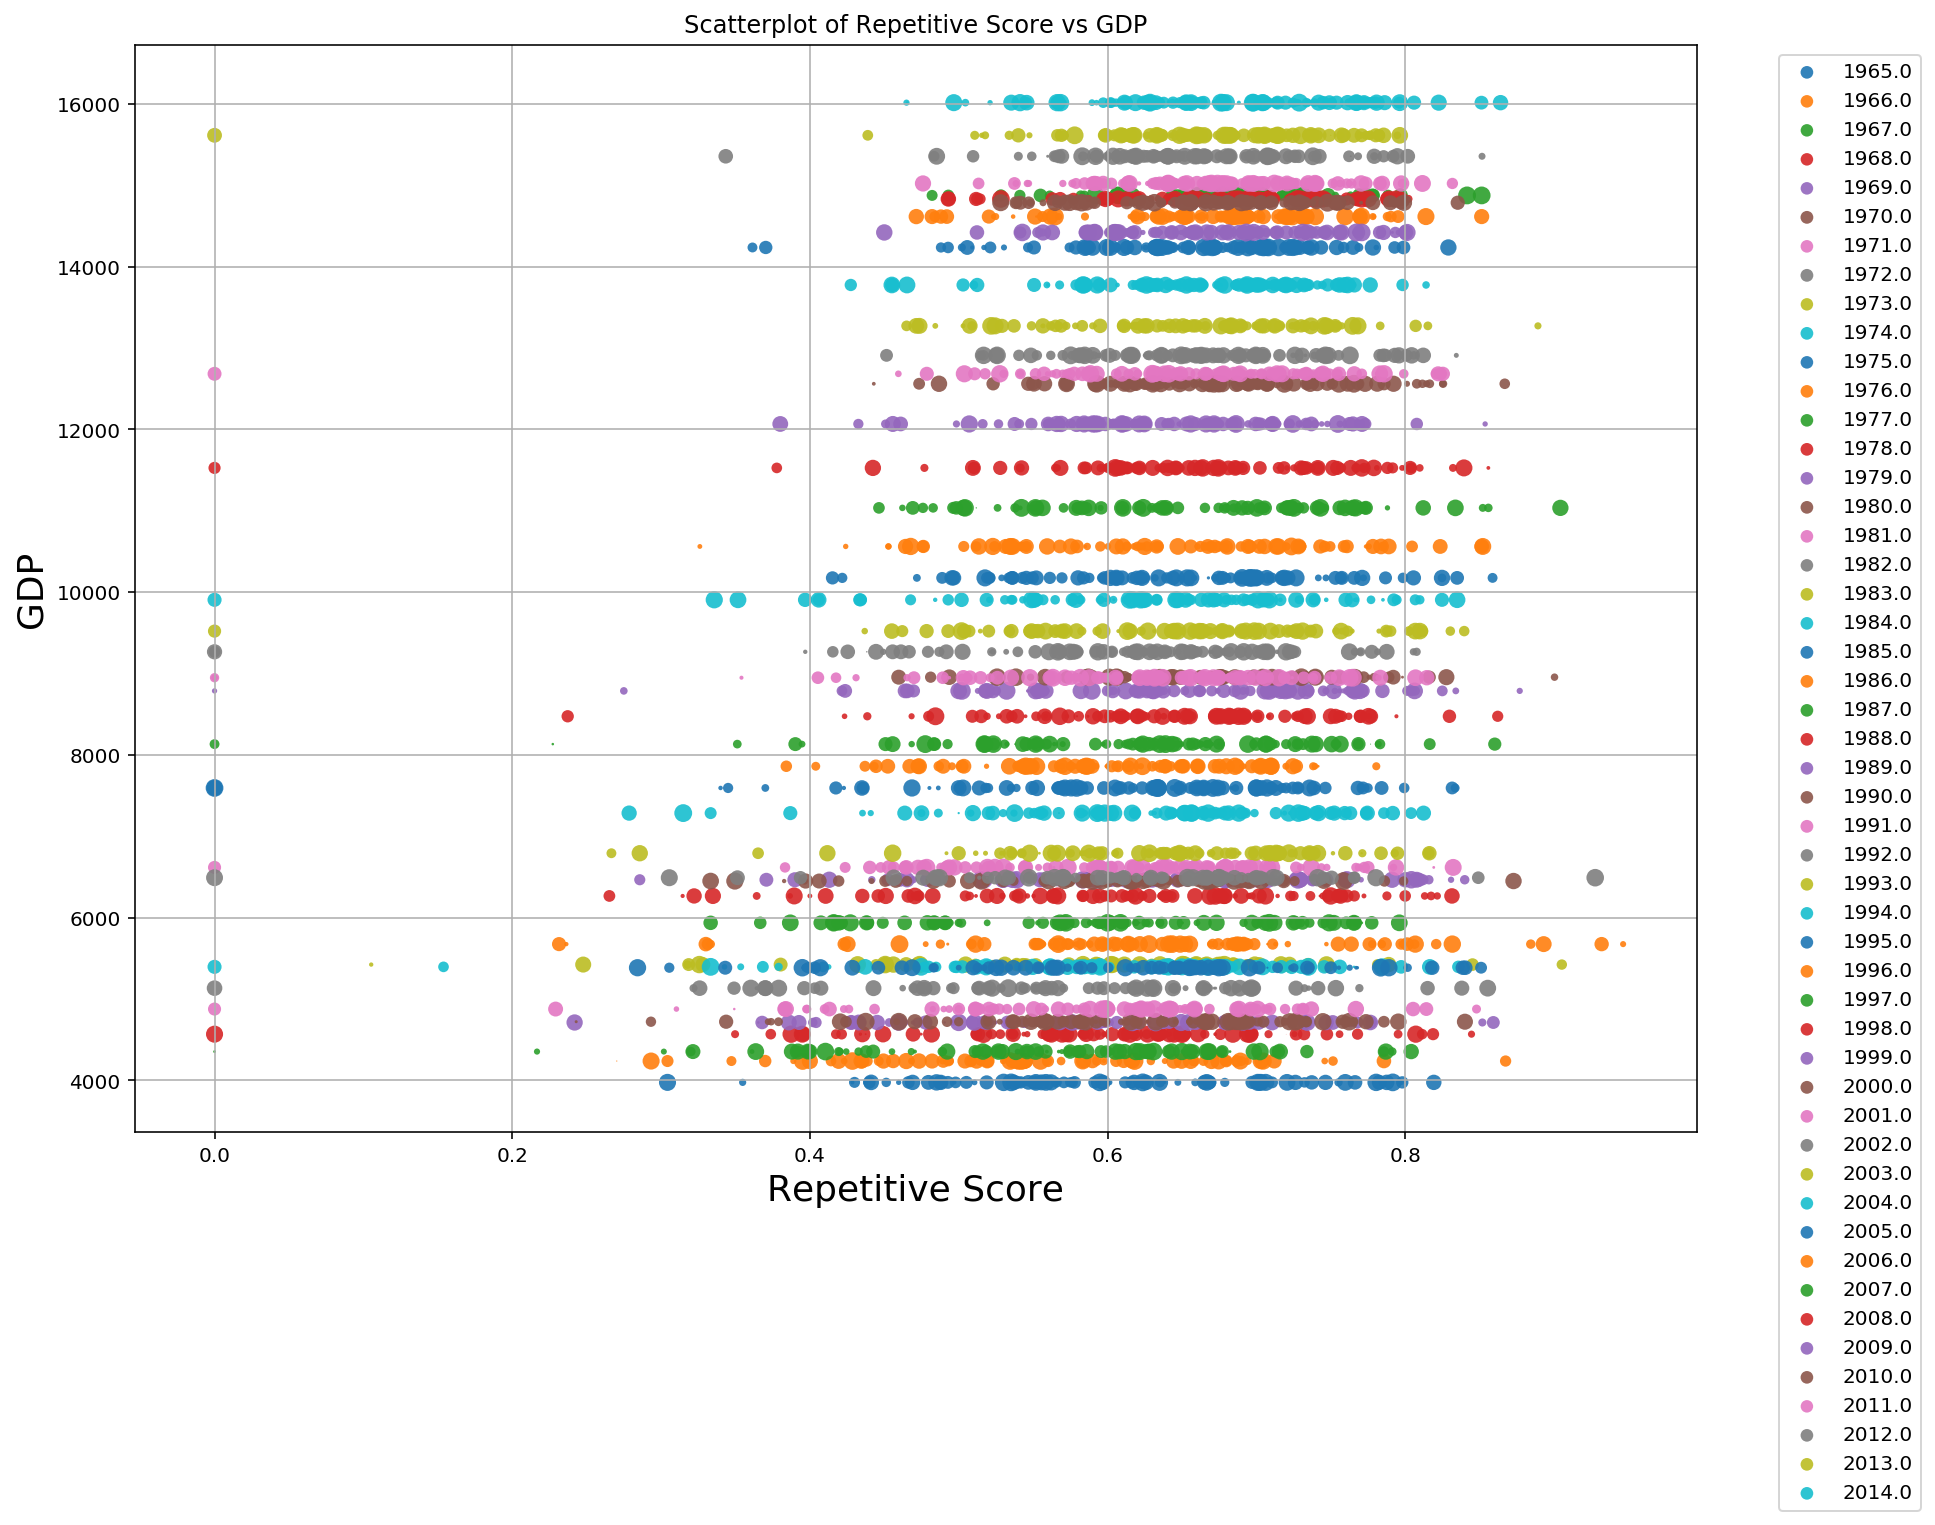

In [18]:
# plot of gdp (x-axis) vs repetitiveness score (y-axis)
years = df_mean_score['Year'].tolist()

fig, ax = plt.subplots(figsize=(14,10))
plt.title('Scatterplot of Repetitive Score vs GDP')
plt.ylabel('GDP', fontsize=18)
plt.xlabel('Repetitive Score', fontsize=18)
for year in years:
    df_year = df_gdp_vs_r_score[df_gdp_vs_r_score['Year'] == year]
    list_year_gdp = df_year['gdp_adjusted'].tolist()
    list_year_r_score = df_year['RepetitiveScore'].tolist()
    
    n = len(list_year_gdp)
    scale = 80.0 * np.random.rand(n)
    
    ax.scatter(list_year_r_score, list_year_gdp, s=scale, label=year,
               alpha=0.9, edgecolors='none')

ax.legend()
leg = plt.legend( loc = 'upper right')
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
xOffset = .15
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

ax.grid(True)

plt.show()

### Results (Visualization):

The histogram of the Repetitive Score revealed itself to be a normal (gaussian) distribution. This was expected since a normal distribution is the most commonly found distribution.

The plot of GDP over time revealed a positive slope (GDP increases over time). This was expected because we know that domestic GDP has been increasing each year. We would like to point out that our plot of GDP over time may not look identical to other plots of GDP over time since our data points are split annually. To be more precise, since our points are annual GDP there is less variability in our plot.

The plot of mean Repetitive Score revealed a lot of variability: The mean repetitive score varied annually, however, the plot showed a positive trend in the Repetitive Score over time. We believe the variability in the repetitive score can be explained by factors such as different taste in music of the time. However, main point is that the mean Repetitive Score has a positive slope over time.


# Statistical Analysis

#### What is the relationship between (Mean) Repetitive Score and GDP?

In this section we use the corr function of pandas to see how well correlated repetitive score is to GDP. We follow that up with using patsy's OLS regression function to get a summary of our data to see if our model is a good fit.

We need to normalizse the GDP to be witin the range of 0 and 1 so we will write a function to do that so we can use the apply function.

In [19]:
def normalizeGDPforSongScore(num):
    return num / df_song_score['gdp_adjusted'].max()

df_song_score['gdp_norm'] = df_song_score['gdp_adjusted'].apply(normalizeGDPforSongScore)

In [20]:
#df_mean_score
df_song_score['Year'] = df_song_score['Year'].apply(stringToFloat)
df_song_score.head()

,Year,RepetitiveScore,gdp_adjusted,gdp_norm
0,1965.0,0.488000,3976.7,0.241429
1,1965.0,0.539216,3976.7,0.241429
2,1965.0,0.710526,3976.7,0.241429
3,1965.0,0.620690,3976.7,0.241429
4,1965.0,0.497908,3976.7,0.241429


In [21]:
def getNormalizeGDPforMeanScore(year):
    return df_song_score.loc[df_song_score['Year'] == year, 'gdp_norm'].iloc[0]

df_mean_score['gdp_norm'] = df_mean_score['Year'].apply(getNormalizeGDPforMeanScore)
df_mean_score.head()

,Year,MeanRepetitiveScore,gdp_norm
0,1965.0,0.601012,0.241429
1,1966.0,0.557716,0.257348
2,1967.0,0.548625,0.264408
3,1968.0,0.591137,0.277388
4,1969.0,0.579273,0.286100


We can see that the correlation between GDP and the repetitive score is 0.895230 = 89%, which implies a strong positive correlation; this correlation supports our hypothesis that there is a relationship between GDP and repetitiveness of a song.

In [22]:
df_mean_score.corr()

,Year,MeanRepetitiveScore,gdp_norm
Year,1.000000,0.907948,0.989039
MeanRepetitiveScore,0.907948,1.000000,0.895230
gdp_norm,0.989039,0.895230,1.000000


We will now run the OLS test to check if we have good/relevant data.

In [23]:
# Statistical Analysis for Repetitive Score given gdp_norm
outcome, predictors = patsy.dmatrices('gdp_norm ~ MeanRepetitiveScore', df_mean_score)

# Now use statsmodels to intialize an OLS linear model
#  This step initializes the model, and provides the data (but does not actually compute the model)
mod = sm.OLS(outcome, predictors)

# Finally, fit the model
res = mod.fit()

# Check out the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               gdp_norm   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     193.7
Date:                Thu, 22 Mar 2018   Prob (F-statistic):           1.80e-18
Time:                        20:26:46   Log-Likelihood:                 42.806
No. Observations:                  50   AIC:                            -81.61
Df Residuals:                      48   BIC:                            -77.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.2598    

We see that the adjusted R-squared score is 0.797 which implies a good model fit.
Next we scatterplot gdp vs repetitive score and from teh best fit line we see there is a linear relationship between the two variables.

[ 6.07495213 -3.25979024]


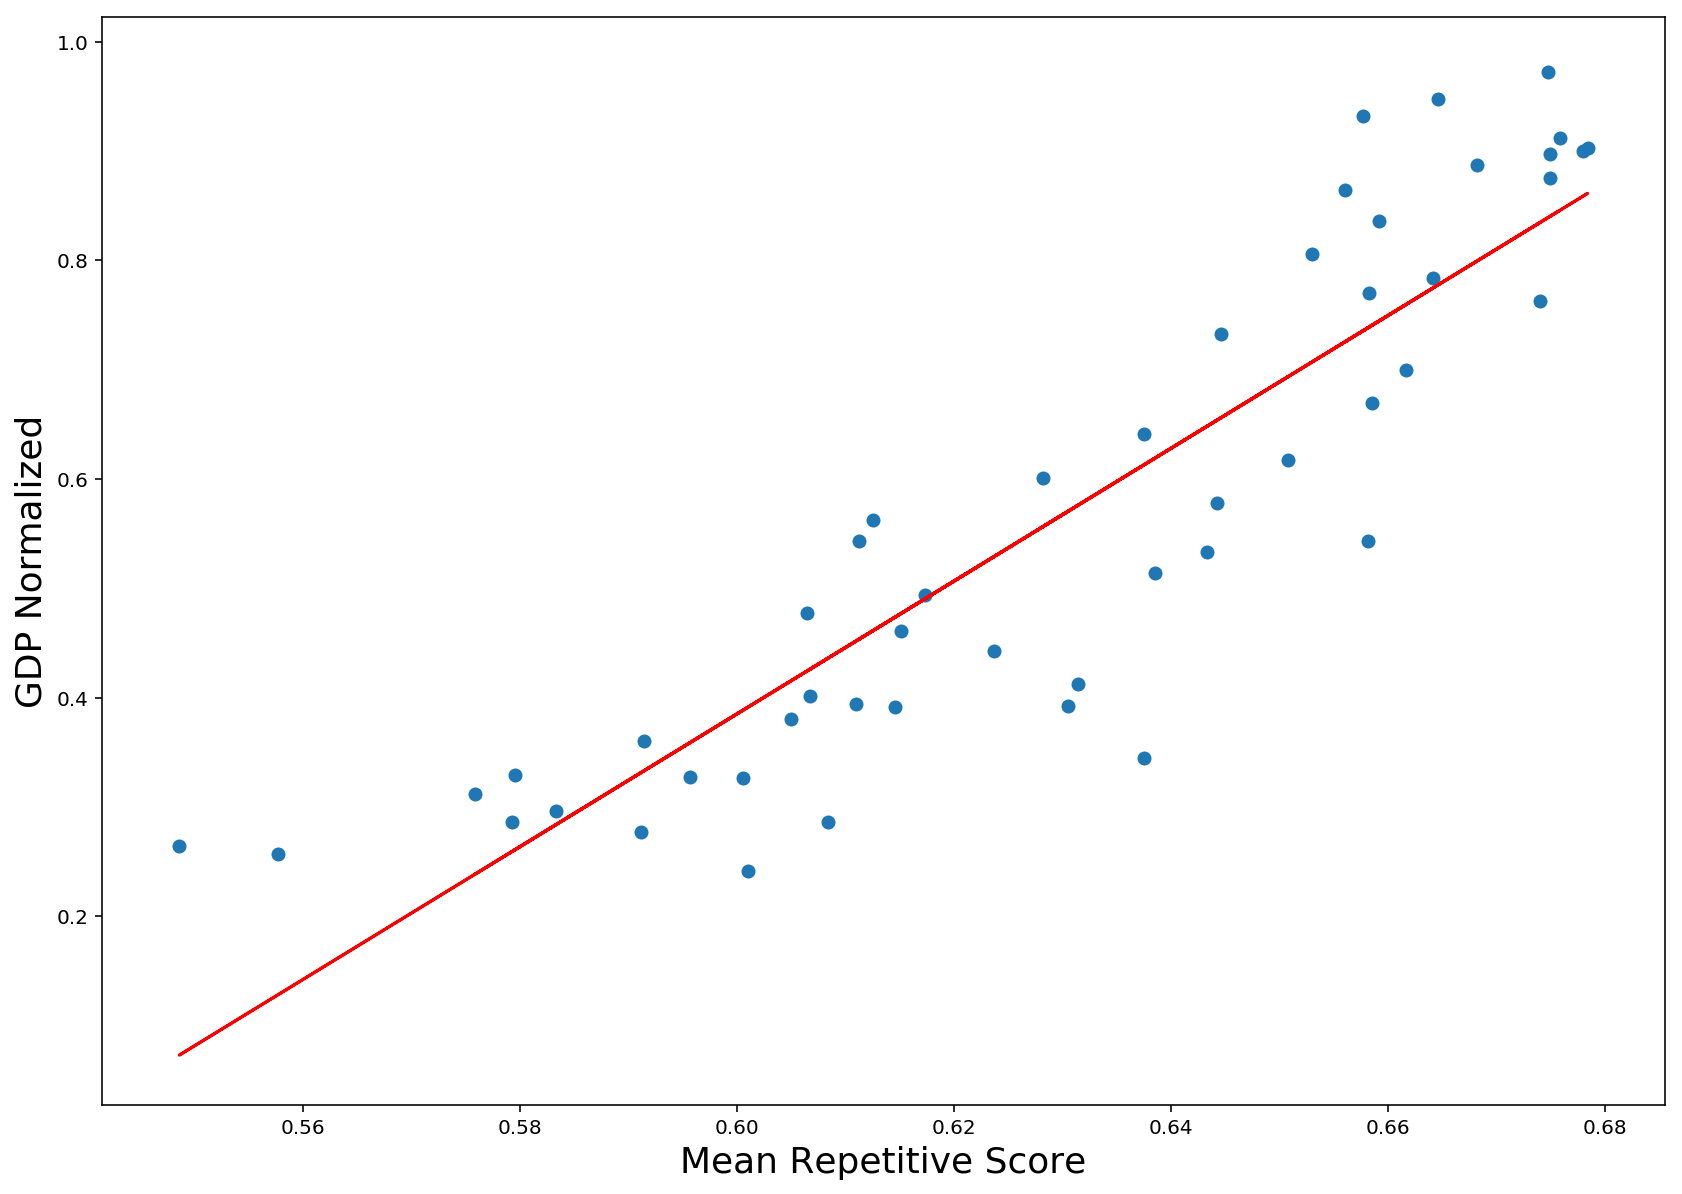

In [24]:
# best fit line for gdp_norm vs Mean Repetitive Score
x = df_mean_score['MeanRepetitiveScore']
y = df_mean_score['gdp_norm']

fig, ax = plt.subplots(figsize=(14,10))

plt.xlabel('Mean Repetitive Score', fontsize=18)
plt.ylabel('GDP Normalized', fontsize=18)

fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)

print(fit)

[ 0.57508181  0.21949277]


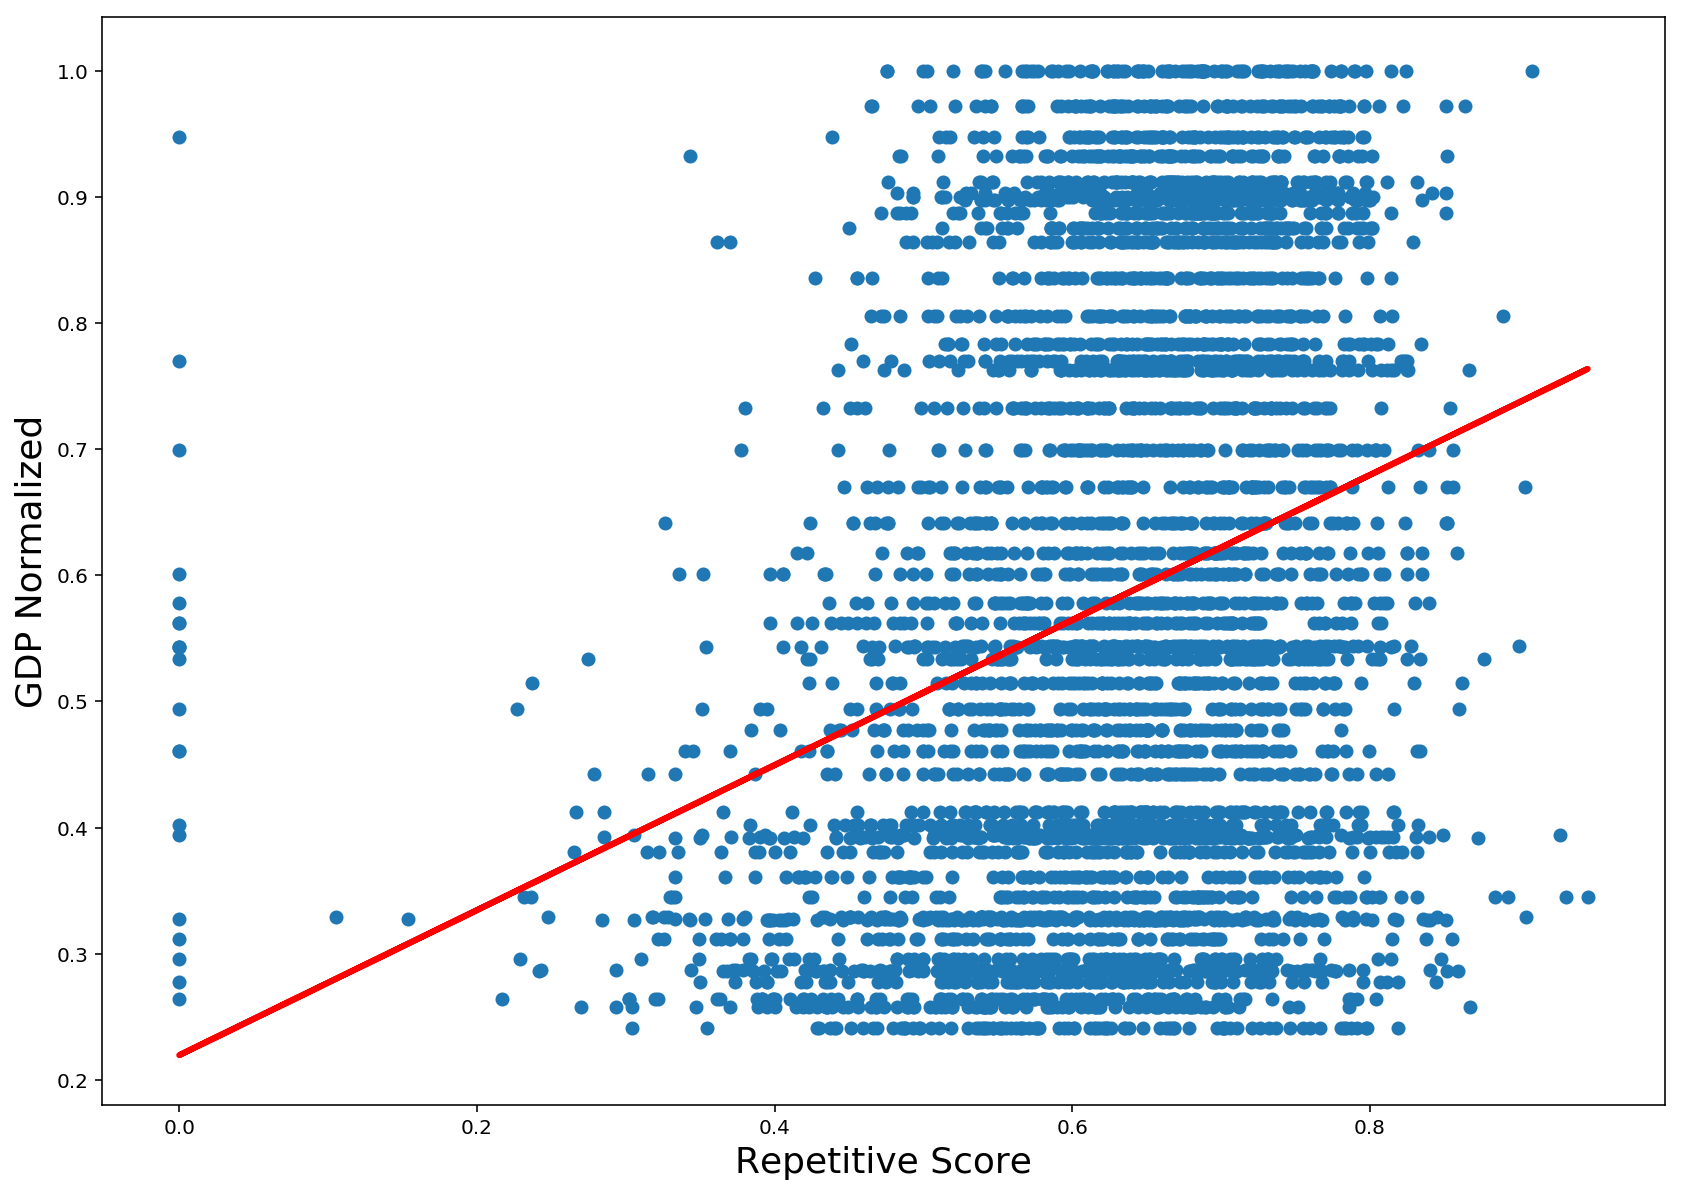

In [25]:
# best fit line for gdp_norm vs Repetitive Score
x = df_song_score['RepetitiveScore']
y = df_song_score['gdp_norm']

fig, ax = plt.subplots(figsize=(14,10))

plt.xlabel('Repetitive Score', fontsize=18)
plt.ylabel('GDP Normalized', fontsize=18)

fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red', lw=3)
ax.scatter(x, y)

print(fit) # y = 0.12888181 * x + 0.55670815

# Predictive Analysis

In this part, we train a linear model to make predictions on new data (2018 songs)  in which we only have the repetitive score of each song to show that on average, current songs are more repetitive.

##### If given the repetitive score, can we predict the normalized GDP?
##### Is the mean predicted normalized GDP higher than previous years?

To test the validity of our predictive model, we import a dataset of the current top 20 songs of 2018. This dataset contains only the song name and song lyrics. We calculate the repetitive score using the song lyrics then pass the repetitive score into our predictive model. Because 2018 US GDP is higher than previous years, our predicted GDPs should, on average, be higher than the GDPs from previous years.




## Training model using mean repetitive score

In [26]:
# Split into training and test sets
X = df_mean_score[['MeanRepetitiveScore']]
y = df_mean_score[['gdp_norm']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
# training linear regression model to predict gdp norm from repetitive score
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

reg_score = reg.score(X_test, y_test)
intercept = reg.intercept_[0]
coef = reg.coef_[0][0]

print("Our Model's fit is {}".format(reg_score))
print("The coefficent for Repetitive Score is {}".format(coef)) # in our model ...% of the variability in gdp_norm can be explained by repetitive score
print("The intercept for our model is {}".format(intercept))

y_predict = reg.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)

print("The Mean Squared Error for our model is {}".format(regression_model_mse))

Our Model's fit is 0.7215389794442433
The coefficent for Repetitive Score is 6.143922863545466
The intercept for our model is -3.321039423090406
The Mean Squared Error for our model is 0.014918425357900982


In [28]:
# function to predict gdp norm using repetitive score
df_mean_score['Predicted_gdp_norm'] = df_mean_score['MeanRepetitiveScore'].apply(reg.predict)
df_mean_score.head()

,Year,MeanRepetitiveScore,gdp_norm,Predicted_gdp_norm
0,1965.0,0.601012,0.241429,[[0.371534854581]]
1,1966.0,0.557716,0.257348,[[0.105522956291]]
2,1967.0,0.548625,0.264408,[[0.0496694437245]]
3,1968.0,0.591137,0.277388,[[0.310861676141]]
4,1969.0,0.579273,0.286100,[[0.237968826836]]


[ 6.14392286 -3.32103942]


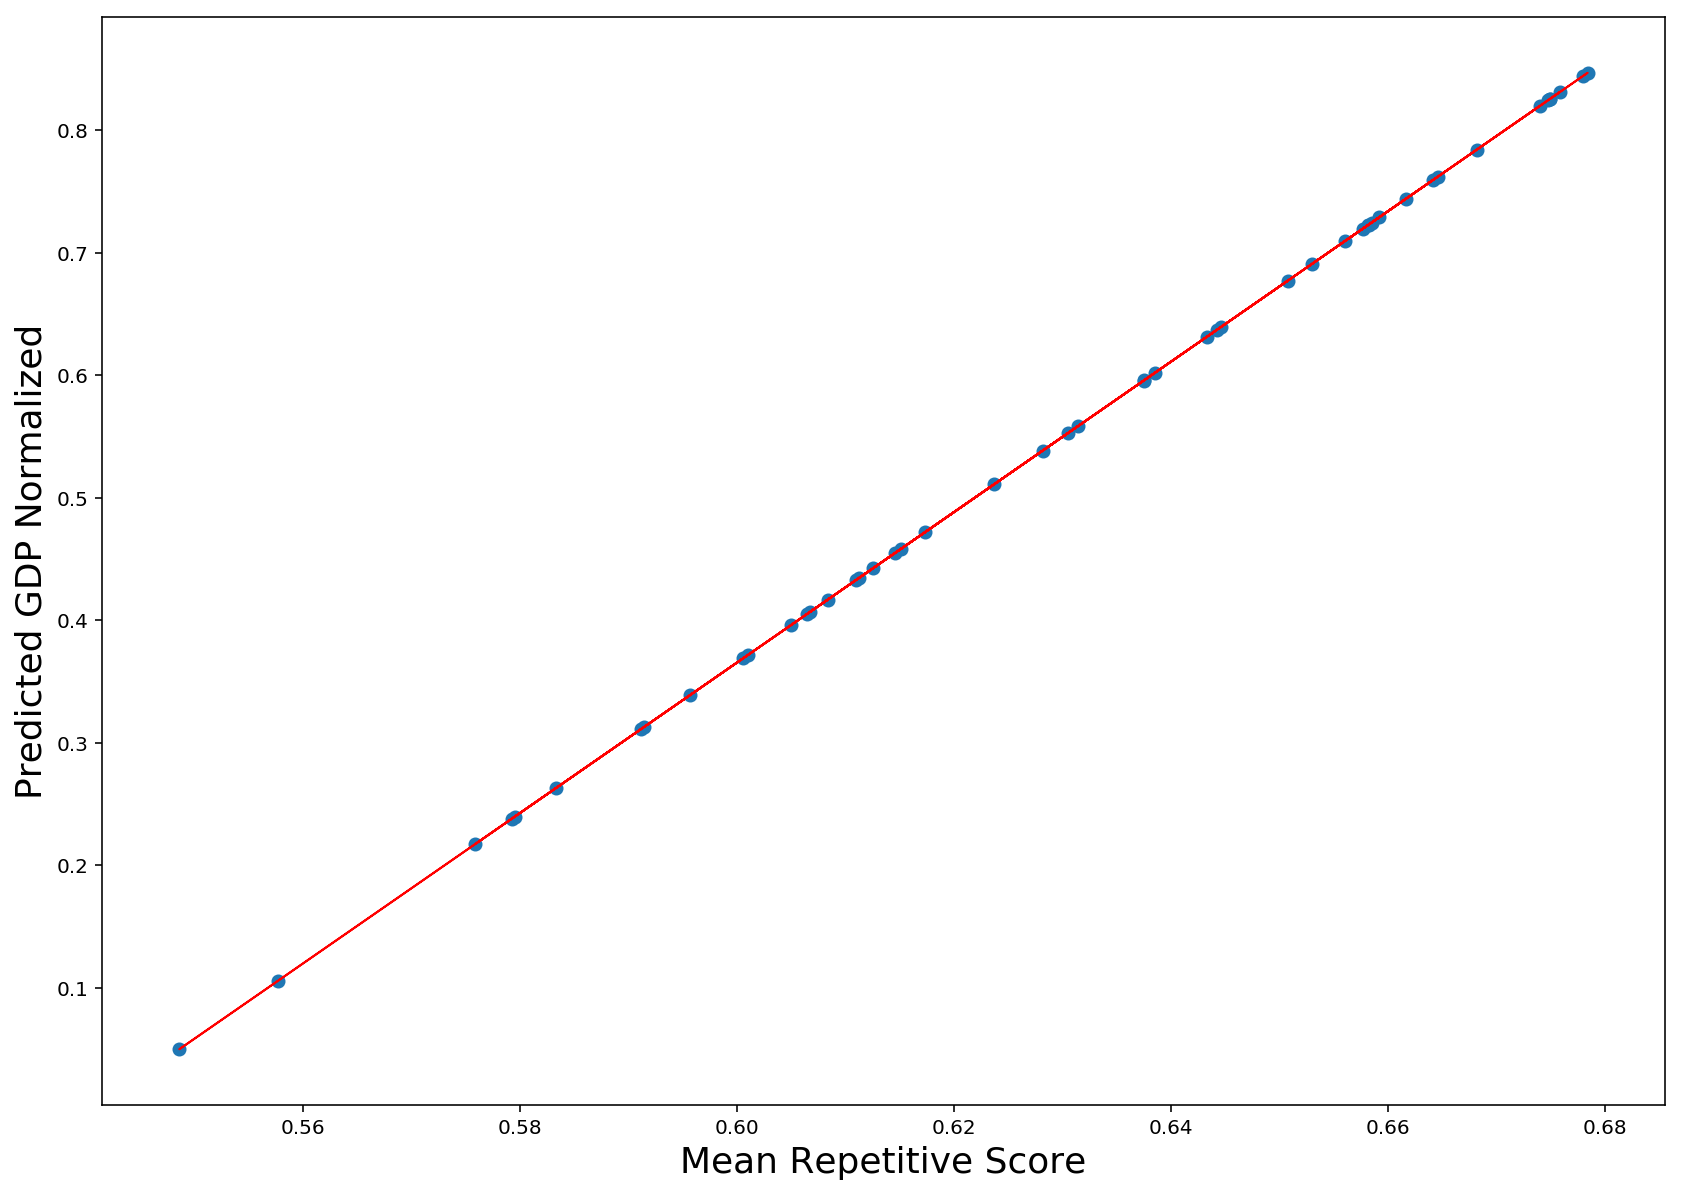

In [29]:
# best fit line for predicted gdp_norm vs Repetitive Score
x = df_mean_score['MeanRepetitiveScore']
y = df_mean_score["Predicted_gdp_norm"]

fig, ax = plt.subplots(figsize=(14,10))

plt.xlabel('Mean Repetitive Score', fontsize=18)
plt.ylabel('Predicted GDP Normalized', fontsize=18)

fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red', lw=1)
ax.scatter(x, y)

print(fit)

## Predicting Normalized GDP for 2018 Popular Lyrics

In [30]:
# Import 2018 popular music and clean up

df_2018 = pd.read_csv("2018lyrics.csv")
df_2018.columns = ['Song', 'Lyrics']
df_2018['Lyrics'] = df_2018['Lyrics'].str.lower()

df_2018['Lyrics'] = df_2018['Lyrics'].replace('\n',' ', regex=True)
df_2018['Lyrics'] = df_2018['Lyrics'].replace('\(',' ', regex=True)
df_2018['Lyrics'] = df_2018['Lyrics'].replace('\)',' ', regex=True)
df_2018['Lyrics'] = df_2018['Lyrics'].replace('\?',' ', regex=True)
df_2018['Lyrics'] = df_2018['Lyrics'].replace('\,',' ', regex=True)
df_2018['Lyrics'] = df_2018['Lyrics'].replace('\.',' ', regex=True)
df_2018['Lyrics'] = df_2018['Lyrics'].replace('\'',' ', regex=True)

df_2018

,Song,Lyrics
0,god’s plan,yeah they wishin and wishin and wishin and ...
1,perfect,i found a love for me darling just dive right ...
2,finesse,ooh don t we look good together there s a re...
3,meant to be,baby lay on back and relax kick your pretty ...
4,psycho,damn my ap goin psycho lil mama bad like m...
5,the middle,emotion is my middle name i lay in bed and li...
6,havana,hey havana ooh na-na ay half of my heart is...
7,pray for me,i m always ready for a war again go down that ...
8,look alive,tay keith fuck these niggas on yeah yeah woo...
9,all the stars,love let s talk about love is it anything and...


Using df_2018 we will find its repetitive score and predict the GDP based on this data.

In [31]:
df_2018['RepetitiveScore'] = df_2018['Lyrics'].apply(getRepetitiveScore)
df_2018['Predicted_gdp_norm'] = df_2018['RepetitiveScore'].apply(reg.predict)

In [32]:
def denormalizeGDP(num):
    return num[0][0] * df_song_score['gdp_adjusted'].max()

def removeBrackets(n):
    return n[0][0]

df_2018['Predicted_gdp'] = df_2018['Predicted_gdp_norm'].apply(denormalizeGDP)
df_2018['Predicted_gdp_norm'] = df_2018['Predicted_gdp_norm'].apply(removeBrackets)
df_2018.head()

,Song,Lyrics,RepetitiveScore,Predicted_gdp_norm,Predicted_gdp
0,god’s plan,yeah they wishin and wishin and wishin and ...,0.617886,0.475206,7827.349012
1,perfect,i found a love for me darling just dive right ...,0.576271,0.219526,3615.927366
2,finesse,ooh don t we look good together there s a re...,0.773707,1.432556,23596.347279
3,meant to be,baby lay on back and relax kick your pretty ...,0.757720,1.334332,21978.450491
4,psycho,damn my ap goin psycho lil mama bad like m...,0.647166,0.655101,10790.492576


Here we plot the data of this smaller dataset to see if it appears normalized like our larger billboard dataset.

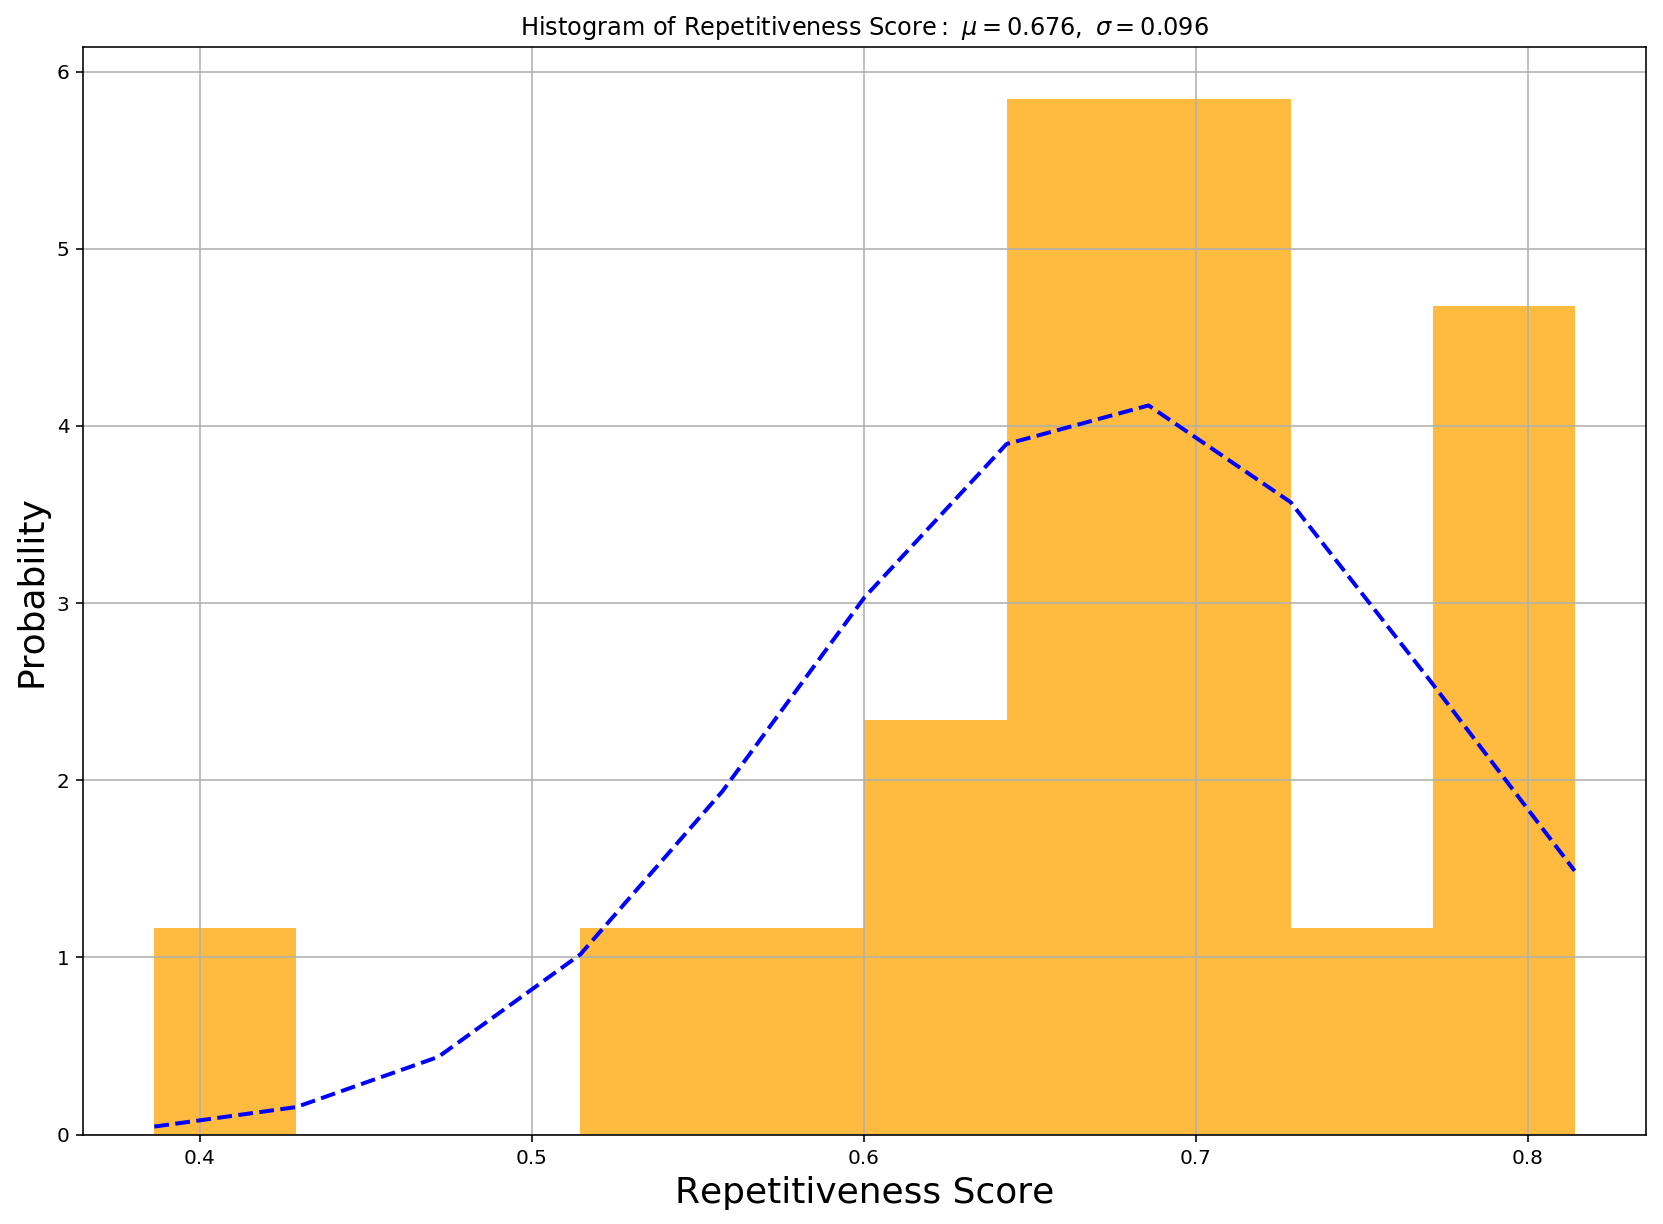

In [33]:
# best fit of data
repetitive_score_list = df_2018["RepetitiveScore"].tolist()
(mu, sigma) = norm.fit(repetitive_score_list)

# the histogram of the data
plt.subplots(figsize=(14,10))
n, bins, patches = plt.hist(repetitive_score_list, 10, normed=1, facecolor='orange', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'b--', linewidth=2)

#plot

plt.xlabel('Repetitiveness Score', fontsize=18)
plt.ylabel('Probability', fontsize=18)
plt.title(r'$\mathrm{Histogram\ of\ Repetitiveness\ Score:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

#### The mean Repetitive Score (0.676) is higher in 2018 than the mean of 1965 - 2015 (0.632)

In [34]:
mean_gdp_2018 = df_2018['Predicted_gdp_norm'].mean()
print("The mean predicted GDP in 2018 is {}".format(mean_gdp_2018))

The mean predicted GDP in 2018 is 0.8336557878665302


In [35]:
mean_gdp_overtime = df_mean_score['gdp_norm'].mean()
print("The mean GDP from 1965 - 2015 is {}".format(mean_gdp_overtime))

The mean GDP from 1965 - 2015 is 0.5688992502200771


### Results (Predictive Analysis)

#### The predicted GDP in 2018 is much higher than the mean GDP from 1965 - 2015

In our predictive analysis section, we predicted GDPs based on the given repetitive scores. The songs that we chose to make predictions on were popular songs from 2018. Since we do not know the GDP of 2018, we will make a prediction of 2018’s GDP based on the list of popular songs. The predictions that our model produced indicated that the mean GDP of 2018 will be much higher than the GDP of past years, which fits our hypothesis that there is a positive correlation between domestic GDP and how repetitive popular music is.


[ 6.14392286 -3.32103942]


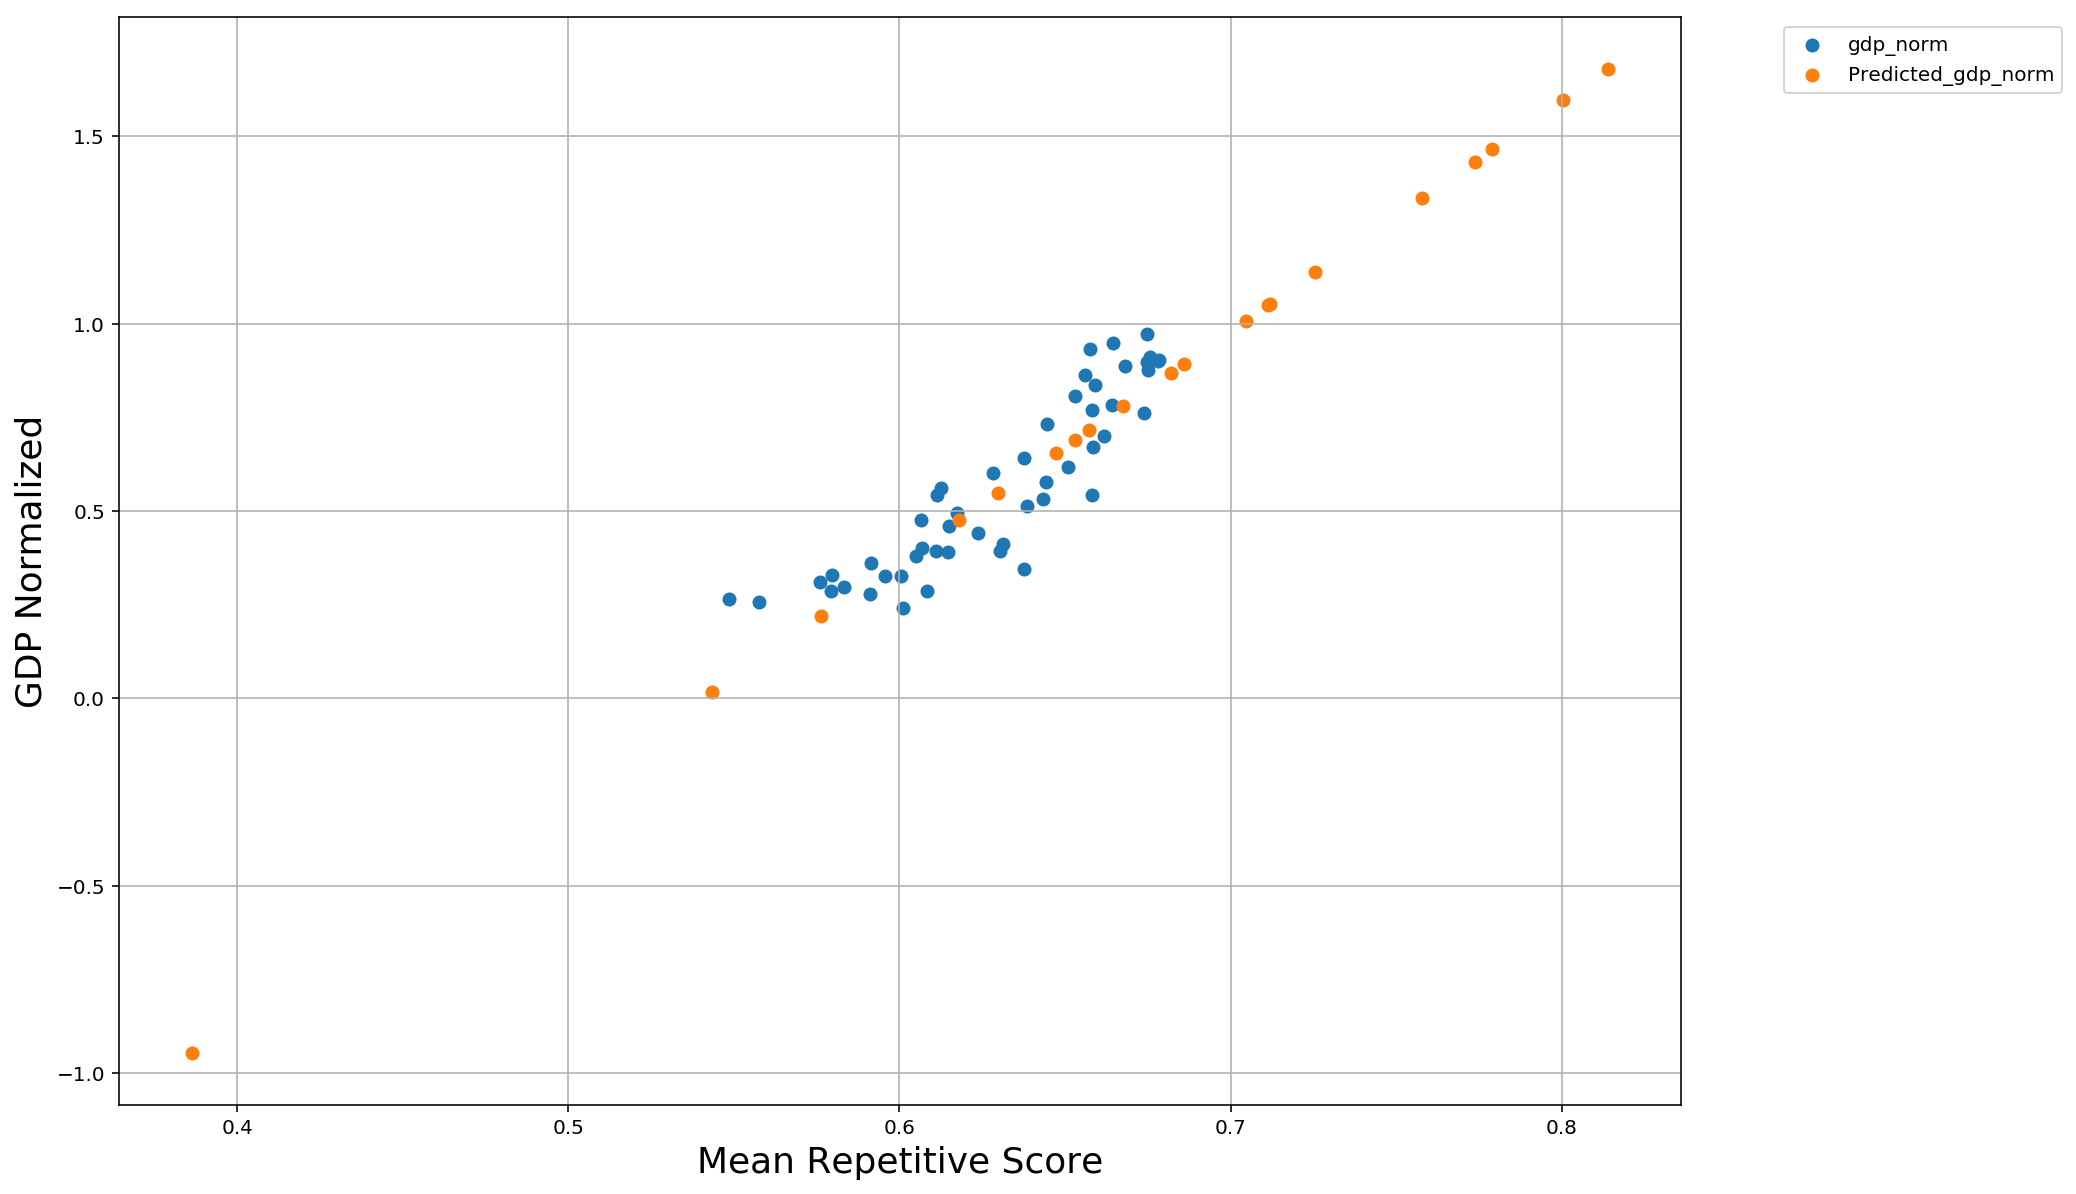

In [36]:
# best fit line for gdp_norm vs Mean Repetitive Score
x = df_mean_score['MeanRepetitiveScore']
y = df_mean_score['gdp_norm']

xs = df_2018['RepetitiveScore']
ys = df_2018['Predicted_gdp_norm']

fig, ax = plt.subplots(figsize=(14,10))

plt.xlabel('Mean Repetitive Score', fontsize=18)
plt.ylabel('GDP Normalized', fontsize=18)

fit = np.polyfit(x, y, deg=1)
#ax.plot(x, fit[0] * x + fit[1],'g', lw=5)
ax.scatter(x, y)

fit = np.polyfit(xs, ys, deg=1)
#ax.plot(xs, fit[0] * xs + fit[1], 'r')
ax.scatter(xs, ys)

ax.legend()
leg = plt.legend( loc = 'upper right')
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
xOffset = .25
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

ax.grid(True)

print(fit)

# Ethics and Privacy

There is little concern over the ethics and privacy of the way we acquired the data that used in this project, as it all came from open-source websites (BEA and Kaggle). BEA, being a government agency, operates on a public domain, and Billboard likewise allows for non-commercial use of its publications. There are also no issues associated with acquiring and using popular song lyrics, as, while we do not own these songs, our use of them is totally non-commercial. The only potential ethical concern is negatively associating certain artists with repetitive lyrics, so we removed their names from our billboard.csv. The third dataset, 2018lyrics.csv, contains only song names and lyrics associated with each song. There is no feature in this dataset that infringes on any individual’s privacy.

Since we are only including Billboard 100 songs in the dataset, we are not only assuming that stores play music from that list but also completely ignore songs that did not make it on the list. This dataset was compiled based on Billboard’s own algorithm and metrics, which is highly dependent on online activity and may or may not be what is actually played in stores. This could potentially make our data less accurate since older songs like the Beatles and Michael Jackson songs as well as indie songs and instrumentals are often played in stores alongside more modern pop songs. 

Even though GDP is primarily influenced by consumer spending (70%), it is also influenced by investment activity (17%), government spending (19%), and net imports/exports. This affects the accuracy of our analysis because annual GDP is not a direct measure of consumer spending, The reported figure also ignores other potential influencers of GDP such as popular trends, product quality, and advertising as well as more extreme factors such as war or market failure (Dot Com bust, Great Recession). The consumer spending figure also accounts for online shopping which is something our data completely ignores as we have no way of knowing if consumers are even playing music at all during this process. 



# Discussion/Conclusion

There are several pitfalls and potential improvements we could look to address should we ever repeat this project in the future. One potential pitfall is that we, due to time constraints, did not write an algorithm that would remove common articles, pronouns, and conjunctions such as ‘the’, ‘it’, and ‘and’ that would inflate the repetitiveness score of each song.  This is somewhat balanced out by the fact that every song would be affected by this, but the inflation is not fully equalized as not all songs are affected to the same degree. 

Another potential improvement would be to look directly at consumer spending statistics rather than GDP, as the lexical redundancy of popular songs typically does not affect government spending and net imports/exports. It could potentially affect investment, however, as consumer expenditures do make certain industries more profitable, which in turn would influence investment activity. However, focusing primarily on consumer spending would allow us to draw more definitive conclusions between song lyrics and money movement as we would only be looking the component of GDP directly related to what we are analyzing. Failure on our part to implement this for the project was due to oversight and a lack of understanding of how GDP works.

Another improvement we could make is to do more research into exactly what music malls and stores typically play. For this project, we just assumed that all malls and stores invariably played the top songs taken off of Billboard.com, but later research found that this was not really the case; Walmart’s playlist included songs outside of the 21st century such as The River of Dreams by Billy Joel (1993), Breakfast at Tiffany's by Deep Blue Something (1993), and Little Sister by Elvis Presley (1961), and an NPR article about an interview with two DJs who put together playlists for mall stores suggested that instrumentals and indie music are also played depending on the store. This is something we could account for in the future by requesting mall specific playlists instead of just looking at annual music charts. 

Alternatively, we could make this project very specific and solely look at how lyrical complexity affected the profitability of the music industry as a whole, including music related merchandising and branding. This is somewhat less interesting than looking at which background music psychologically influences consumers to spend more, but potentially more definitive conclusions could be drawn this way, as we would be looking at more direct and causal relationships, such as the one between album sales/downloads and merchandising, and less psychology, which is unfortunately almost entirely made up of correlative relationships. 


#### Repetitiveness of Music Over Time
Based on our results, we conclude that Billboard Top 100 song lyrics are getting more repetitive over time, which aligns with our hypothesis. Over time, repetitive score increases and data variability drops, that is, more modern songs have a smaller standard deviation of lyrical repetitiveness than do older songs. This could potentially imply that record companies are optimizing lexical redundancy that would make a hit song, as too little redundancy makes the song distracting but too much redundancy could make the song annoying (Nunes et al., 2014). Further research of this dataset could reveal if songs become popular because of lyrical repetitiveness and whether this trend influences how songs are written. 

#### GDP
We can see that the positive trend in GDP reflects how the increase in consumer behavior has a direct correlation with the general repetitiveness of popular music. We can also see that as the repetitiveness score increases, the deviation of the data decreases, revealing that song lyrics are becoming more consistently redundant over time. Since we established a correlation between the repetition in music and GDP, we can definitively say that lyrical repetitiveness may be measured as a function of GDP.



# References

Amadeo, K. (2018). Components of GDP: Explanation, Formula and Chart. Retrieved March 23, 2018, from https://www.thebalance.com/components-of-gdp-explanation-formula-and-chart-3306015

Kang E., Lakshmanan A. (2016). “Role of Executive Attention in Consumer Learning with Background Music,” University of Cologne, Germany.State University of New York, Buffalo, USA. (source: https://mgt.buffalo.edu/content/dam/mgt/Faculty-and-Research/Marketing/Documents/lakshmanan/kang-lakshmanan2016.pdf)

Morrin M. (2005) “Music motivatews impulse buyers, not thoughtful shoppers” American Psychological Association, November 2005, Vol 36, No. 10 (source: http://www.apa.org/monitor/nov05/music.aspx)

Nunes C. J., Ordanini A., Valsesia F. (2014) “The power of repetition: repetitive lyrics in a song increase processing fluency and drive market success,” Journal of Consumer Psychology, Elsevier, April 2015. (source: https://www.sciencedirect.com/science/article/pii/S1057740814001260)
Retailwise U.S.A. (2014). Sensory Shopping: Music. Retrieved March 23, 2018, from http://www.retailwiseusa.com/sensory-shopping-music/

Wilson S. (2003), “The Effect of Music on Perceived Atmosphere and Purchase Intentions in a Restaurant, Sage Journals (31:93-112) (source: http://journals.sagepub.com/doi/abs/10.1177/0305735603031001327)
